In [1]:
import pandas as pd
import numpy as np
import torch
import os
from tqdm.notebook import tqdm
from utils import load_data, Environment, DQN, ReplayMemory, get_select_action_fn, get_optimization_fn, load_model_state, TEST_REGISTERS
from matplotlib import pyplot as plt
from torchviz import make_dot

In [2]:
ACTION_STEP = 100
CHECKPOINT_BASE = 'checkpoints/agent_{}'.format(ACTION_STEP)

In [3]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [4]:
train, test = load_data(0)

In [5]:
env = Environment(train, max_loss=1, action_step=ACTION_STEP)

In [6]:
env.n_actions

4

In [7]:
policy_net = DQN(env.n_actions).to(device)

In [8]:
load_model_state(os.path.join(CHECKPOINT_BASE, 'policy_99.pt'), policy_net)
policy_net.eval()

DQN(
  (rnn_0): GRU(1, 30, batch_first=True)
  (linear_0): Linear(in_features=30, out_features=128, bias=True)
  (rnn_1): GRU(1, 30, batch_first=True)
  (linear_1): Linear(in_features=30, out_features=128, bias=True)
  (rnn_2): GRU(1, 30, batch_first=True)
  (linear_2): Linear(in_features=30, out_features=128, bias=True)
  (linear_3): Linear(in_features=4, out_features=128, bias=True)
  (activation_3): Tanh()
  (linear_4): Linear(in_features=512, out_features=1024, bias=True)
  (activation_4): Sigmoid()
  (dropout_4): Dropout(p=0.2, inplace=False)
  (linear_5): Linear(in_features=1024, out_features=4, bias=True)
  (activation_5): Tanh()
)

In [9]:
select_action = get_select_action_fn(policy_net, env.n_actions, device, eps_start=0, eps_end=0)

In [10]:
state = env.restart()
amounts = []
episode_cost = 0

for t in range(10000):
    # Select and perform an action
    action_idx = select_action(state, env.curr_step)
    next_state, cost, done, _ = env.step(action_idx)
    episode_cost += cost

    # Move to the next state
    state = next_state
    
    if done:
        break
        
    amounts.append(state.current_amount)
    
    print('Day:{}\tMoney:{}\tAction:{}\tCombination:{}'.format(t + 1, state.current_amount, action_idx, env.actions[action_idx]))

Day:1	Money:1000.0	Action:0	Combination:[0. 0. 0. 1.]
Day:2	Money:1000.0	Action:0	Combination:[0. 0. 0. 1.]
Day:3	Money:1000.0	Action:0	Combination:[0. 0. 0. 1.]
Day:4	Money:1000.0	Action:0	Combination:[0. 0. 0. 1.]
Day:5	Money:1000.0	Action:0	Combination:[0. 0. 0. 1.]
Day:6	Money:946.0810810810812	Action:1	Combination:[0. 0. 1. 0.]
Day:7	Money:946.0810810810812	Action:0	Combination:[0. 0. 0. 1.]
Day:8	Money:946.0810810810812	Action:0	Combination:[0. 0. 0. 1.]
Day:9	Money:946.0810810810812	Action:0	Combination:[0. 0. 0. 1.]
Day:10	Money:946.0810810810812	Action:0	Combination:[0. 0. 0. 1.]
Day:11	Money:946.0810810810812	Action:0	Combination:[0. 0. 0. 1.]
Day:12	Money:946.0810810810812	Action:0	Combination:[0. 0. 0. 1.]
Day:13	Money:946.0810810810812	Action:0	Combination:[0. 0. 0. 1.]
Day:14	Money:946.0810810810812	Action:0	Combination:[0. 0. 0. 1.]
Day:15	Money:946.0810810810812	Action:0	Combination:[0. 0. 0. 1.]
Day:16	Money:946.0810810810812	Action:0	Combination:[0. 0. 0. 1.]
Day:17	M

Day:197	Money:166513.41888593766	Action:2	Combination:[0. 1. 0. 0.]
Day:198	Money:166513.41888593766	Action:0	Combination:[0. 0. 0. 1.]
Day:199	Money:166513.41888593766	Action:0	Combination:[0. 0. 0. 1.]
Day:200	Money:166513.41888593766	Action:0	Combination:[0. 0. 0. 1.]
Day:201	Money:166513.41888593766	Action:0	Combination:[0. 0. 0. 1.]
Day:202	Money:166513.41888593766	Action:0	Combination:[0. 0. 0. 1.]
Day:203	Money:166513.41888593766	Action:0	Combination:[0. 0. 0. 1.]
Day:204	Money:184644.70266625975	Action:2	Combination:[0. 1. 0. 0.]
Day:205	Money:184644.70266625975	Action:0	Combination:[0. 0. 0. 1.]
Day:206	Money:184644.70266625975	Action:0	Combination:[0. 0. 0. 1.]
Day:207	Money:184644.70266625975	Action:0	Combination:[0. 0. 0. 1.]
Day:208	Money:184644.70266625975	Action:0	Combination:[0. 0. 0. 1.]
Day:209	Money:184644.70266625975	Action:0	Combination:[0. 0. 0. 1.]
Day:210	Money:184644.70266625975	Action:0	Combination:[0. 0. 0. 1.]
Day:211	Money:184644.70266625975	Action:0	Combin

Day:402	Money:1654365.2964184675	Action:0	Combination:[0. 0. 0. 1.]
Day:403	Money:1654365.2964184675	Action:0	Combination:[0. 0. 0. 1.]
Day:404	Money:1654365.2964184675	Action:0	Combination:[0. 0. 0. 1.]
Day:405	Money:1654365.2964184675	Action:0	Combination:[0. 0. 0. 1.]
Day:406	Money:1654365.2964184675	Action:0	Combination:[0. 0. 0. 1.]
Day:407	Money:1654365.2964184675	Action:0	Combination:[0. 0. 0. 1.]
Day:408	Money:1654365.2964184675	Action:0	Combination:[0. 0. 0. 1.]
Day:409	Money:1654365.2964184675	Action:0	Combination:[0. 0. 0. 1.]
Day:410	Money:1654365.2964184675	Action:0	Combination:[0. 0. 0. 1.]
Day:411	Money:1654365.2964184675	Action:0	Combination:[0. 0. 0. 1.]
Day:412	Money:1654365.2964184675	Action:0	Combination:[0. 0. 0. 1.]
Day:413	Money:1654365.2964184675	Action:0	Combination:[0. 0. 0. 1.]
Day:414	Money:1654365.2964184675	Action:0	Combination:[0. 0. 0. 1.]
Day:415	Money:1654365.2964184675	Action:0	Combination:[0. 0. 0. 1.]
Day:416	Money:1654365.2964184675	Action:0	Combin

Day:612	Money:599945664.1810491	Action:0	Combination:[0. 0. 0. 1.]
Day:613	Money:594681353.1676214	Action:2	Combination:[0. 1. 0. 0.]
Day:614	Money:594681353.1676214	Action:0	Combination:[0. 0. 0. 1.]
Day:615	Money:616961817.988921	Action:3	Combination:[1. 0. 0. 0.]
Day:616	Money:610249039.8504194	Action:2	Combination:[0. 1. 0. 0.]
Day:617	Money:615103874.1374867	Action:2	Combination:[0. 1. 0. 0.]
Day:618	Money:615103874.1374867	Action:0	Combination:[0. 0. 0. 1.]
Day:619	Money:666122558.6378059	Action:1	Combination:[0. 0. 1. 0.]
Day:620	Money:743884494.038897	Action:1	Combination:[0. 0. 1. 0.]
Day:621	Money:985403592.0803049	Action:2	Combination:[0. 1. 0. 0.]
Day:622	Money:1025454409.8909807	Action:3	Combination:[1. 0. 0. 0.]
Day:623	Money:1259623686.2459347	Action:2	Combination:[0. 1. 0. 0.]
Day:624	Money:1375163917.1820278	Action:2	Combination:[0. 1. 0. 0.]
Day:625	Money:1731565095.2437887	Action:1	Combination:[0. 0. 1. 0.]
Day:626	Money:1839857995.7209287	Action:1	Combination:[0. 0.

In [11]:
state = env.restart()
opt_amounts = []
opt_episode_cost = 0

for t in range(10000):
    # Select and perform an action
    opt_action_idx, _ = env.get_optimals()
    next_state, cost, done, _ = env.step(opt_action_idx)
    opt_episode_cost += cost

    # Move to the next state
    state = next_state
    
    if done:
        break
        
    opt_amounts.append(state.current_amount)
    
    print('Day:{}\tMoney:{}\tAction:{}'.format(t + 1, state.current_amount, opt_action_idx))

Day:1	Money:1000.0	Action:0
Day:2	Money:1005.6764644569522	Action:3
Day:3	Money:1005.6764644569522	Action:0
Day:4	Money:1005.9519922554337	Action:1
Day:5	Money:1005.9519922554337	Action:0
Day:6	Money:1049.6653581660441	Action:2
Day:7	Money:1049.6653581660441	Action:0
Day:8	Money:1050.3750963085763	Action:1
Day:9	Money:1122.9482744905963	Action:2
Day:10	Money:1122.9482744905963	Action:0
Day:11	Money:1151.681363791619	Action:1
Day:12	Money:1159.9528897377513	Action:1
Day:13	Money:1193.1184279937634	Action:2
Day:14	Money:1258.7082380003708	Action:2
Day:15	Money:1258.7082380003708	Action:0
Day:16	Money:1266.3629720221002	Action:3
Day:17	Money:1266.3629720221002	Action:0
Day:18	Money:1280.1738295218533	Action:1
Day:19	Money:1280.1738295218533	Action:0
Day:20	Money:1351.256859845196	Action:2
Day:21	Money:1351.256859845196	Action:0
Day:22	Money:1426.8897090837534	Action:1
Day:23	Money:1613.8975324429452	Action:2
Day:24	Money:1786.8104386941714	Action:2
Day:25	Money:1786.8104386941714	Action:0

Day:617	Money:324368258651.39716	Action:2
Day:618	Money:324368258651.39716	Action:0
Day:619	Money:351272400449.0061	Action:1
Day:620	Money:392279301292.8406	Action:1
Day:621	Money:519641739665.70776	Action:2
Day:622	Money:540762097668.70337	Action:3
Day:623	Money:664248688461.8813	Action:2
Day:624	Money:725177557696.3223	Action:2
Day:625	Money:913121796661.3335	Action:1
Day:626	Money:970228865936.9652	Action:1
Day:627	Money:970228865936.9652	Action:0
Day:628	Money:970228865936.9652	Action:0
Day:629	Money:974623919774.1155	Action:1
Day:630	Money:1036615204957.1791	Action:2
Day:631	Money:1177235503144.7136	Action:2
Day:632	Money:1383926666155.0488	Action:2
Day:633	Money:1432868046723.919	Action:3
Day:634	Money:1614187489447.87	Action:1
Day:635	Money:1654796622905.2563	Action:3
Day:636	Money:1654796622905.2563	Action:0
Day:637	Money:1794853316554.0393	Action:2
Day:638	Money:1952620220217.392	Action:1
Day:639	Money:2058167831826.7676	Action:3
Day:640	Money:2058167831826.7676	Action:0
Day:6

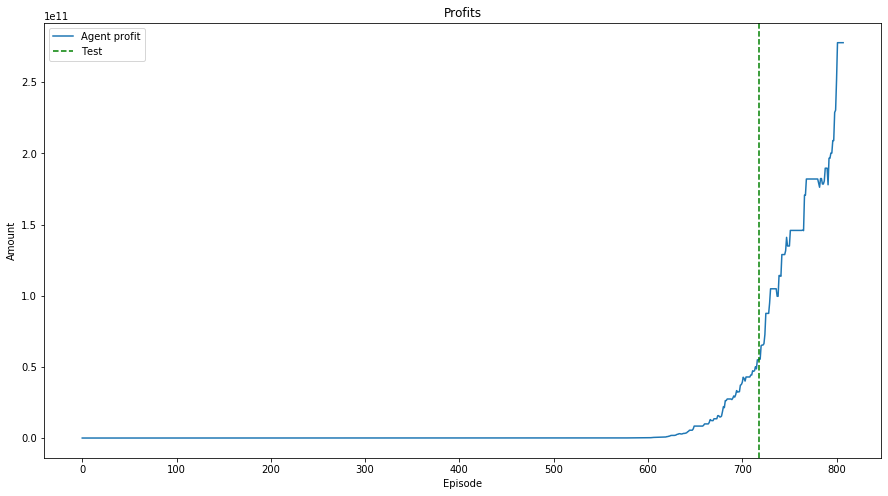

In [12]:
x = np.arange(len(amounts))
plt.figure(figsize=(15, 8))


plt.xlabel('Episode')
plt.ylabel('Amount')
plt.title('Profits')

plt.plot(x, amounts, label='Agent profit')
#plt.plot(x, opt_amounts, label='Optimal profit')

plt.axvline(x=len(amounts) - TEST_REGISTERS, color='green', linestyle='--', label='Test')

plt.legend()
plt.show()
plt.close()

In [13]:
train

array([[1.00301356, 0.97879859, 1.03694581],
       [0.93300922, 0.27000896, 0.91232227],
       [1.01516544, 0.99399691, 1.015625  ],
       ...,
       [1.0200981 , 1.03569714, 1.01176306],
       [0.98361147, 0.98084041, 0.9699446 ],
       [1.02173819, 1.05645139, 1.02436592]])

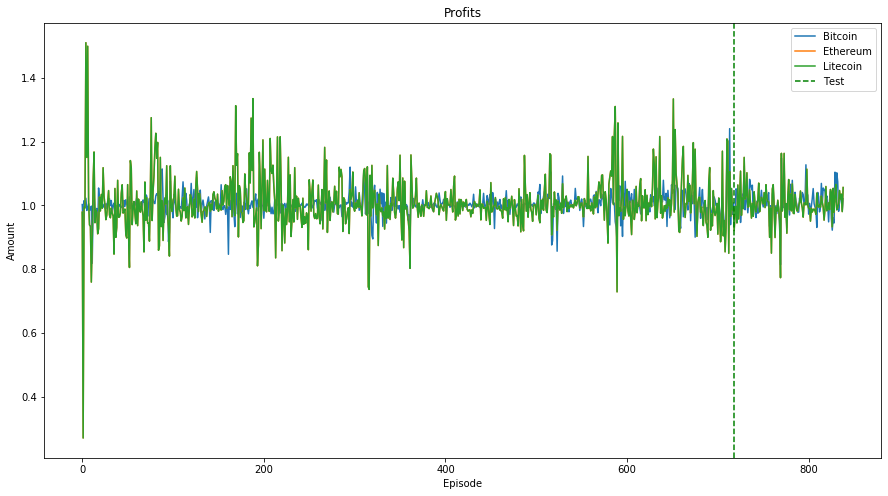

In [14]:
x = np.arange(train.shape[0])
plt.figure(figsize=(15, 8))


plt.xlabel('Episode')
plt.ylabel('Amount')
plt.title('Profits')

plt.plot(x, train[:, 0], label='Bitcoin')
plt.plot(x, train[:, 1], label='Ethereum')
plt.plot(x, train[:, 1], label='Litecoin')
#plt.plot(x, opt_amounts, label='Optimal profit')

plt.axvline(x=len(amounts) - TEST_REGISTERS, color='green', linestyle='--', label='Test')

plt.legend()
plt.show()
plt.close()